# Unsupervised machine learning

## Import dataset and explore data

Find the Kaggle dataset here: https://www.kaggle.com/PromptCloudHQ/imdb-data

We want to clusterize movies from IMDB dataset. On this dataset we have 1000 movies and 12 features on them:

- Rank: Movie rank order
- Title: The title of the film
- Genre: A comma-separated list of genres used to classify the film
- Description: Brief one-sentence movie summary
- Director: The name of the film's director
- Actors: A comma-separated list of the main stars of the film
- Year: The year that the film released as an integer.
- Runtime (Minutes): The duration of the film in minutes.
- Rating: User rating for the movie 0-10
- Votes: Number of votes
- Revenue (Millions): Movie revenue in millions
- Metascore: An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.

Once we clusterized our movies, we will analyze them to evaluate our clustering

In [206]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
movies = pd.read_csv('IMDB-Movie-Data.csv')
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [208]:
movies.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [209]:
movies.shape


(1000, 12)

In [210]:
null_cols = movies.isnull().sum()
null_cols[null_cols > 0]

Revenue (Millions)    128
Metascore              64
dtype: int64

In [211]:
movies["Metascore"] = movies["Metascore"].fillna(movies["Metascore"].mean())
movies["Revenue (Millions)"] = movies["Revenue (Millions)"].fillna(movies["Revenue (Millions)"].mean())

In [212]:
null_cols = movies.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

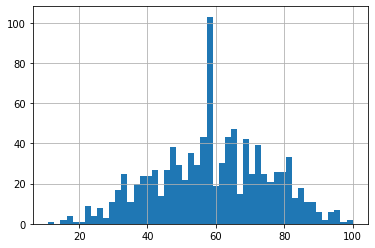

In [213]:
movies["Metascore"].hist(bins=50)

In [214]:
movies.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [215]:
#movies['Genre_1'] = sorted(str(movies['Genre']).split(','))[0]

movies['Genre_1'] = movies['Genre'].map(lambda x : str(x).split(',')[0])
movies['Genre_2'] = movies['Genre'].map(lambda x : str(x).split(',')[1]  if len(str(x).split(','))>1 else 'No genre')
movies['Genre_3'] = movies['Genre'].map(lambda x : str(x).split(',')[2]  if len(str(x).split(','))>2 else 'No genre')



In [216]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre_1,Genre_2,Genre_3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,No genre
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy


In [217]:
movies['Genre'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music', 'Comedy',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Crime,Drama,Horror',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Horror', 'Adventure,Drama,Fantasy',
       'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Mystery,Thriller',
       'Crime,Drama,Mystery', 'Drama,Romance,Thriller',
       'Drama,History,T

We will drop categorial values

In [218]:
movies_num = movies.drop(columns=['Title','Genre','Description','Director','Actors'])
movies_num.head()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre_1,Genre_2,Genre_3
0,1,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi
1,2,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,2016,117,7.3,157606,138.12,62.0,Horror,Thriller,No genre
3,4,2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family
4,5,2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy


In [219]:
#Transform genre, key and time_signature to dummies
movies_num = pd.get_dummies(movies_num, drop_first=True, dtype=float)

In [220]:
movies_num.head()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre_1_Adventure,Genre_1_Animation,Genre_1_Biography,...,Genre_3_Music,Genre_3_Musical,Genre_3_Mystery,Genre_3_No genre,Genre_3_Romance,Genre_3_Sci-Fi,Genre_3_Sport,Genre_3_Thriller,Genre_3_War,Genre_3_Western
0,1,2014,121,8.1,757074,333.13,76.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,2012,124,7.0,485820,126.46,65.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,2016,117,7.3,157606,138.12,62.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2016,108,7.2,60545,270.32,59.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2016,123,6.2,393727,325.02,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Preprocessing

We will scale our data

In [221]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
movies_scale = scaler.fit_transform(movies_num)

## Data Clustering with K-Means

We will cluster the data with K-Means first. The labels_ attributes will be added to the dataframe as a new column. After that we will analyze the genre distribution into our cluster. Let's start with K-Mean

In [222]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=0, n_jobs=-1).fit(movies_scale)
movies_scale = pd.DataFrame(movies_scale)
movies_scale['labels'] = kmeans.labels_
movies['labels'] = kmeans.labels_

In [223]:
movies_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,labels
0,-1.730320,0.379795,0.416350,1.456999,3.112690,2.596136,1.023361,-0.284747,-0.226991,-0.261488,...,-0.063372,-0.214535,-0.717741,-0.274352,3.199368,-0.114766,-0.391666,-0.095298,-0.070888,1
1,-1.726856,-0.244355,0.575911,0.292924,1.674960,0.451452,0.361768,3.511885,-0.226991,-0.261488,...,-0.063372,-0.214535,-0.717741,-0.274352,3.199368,-0.114766,-0.391666,-0.095298,-0.070888,1
2,-1.723391,1.003945,0.203601,0.610399,-0.064676,0.572452,0.181334,-0.284747,-0.226991,-0.261488,...,-0.063372,-0.214535,1.393261,-0.274352,-0.312562,-0.114766,-0.391666,-0.095298,-0.070888,2
3,-1.719927,1.003945,-0.275084,0.504574,-0.579129,1.944336,0.000900,-0.284747,4.405470,-0.261488,...,-0.063372,-0.214535,-0.717741,-0.274352,-0.312562,-0.114766,-0.391666,-0.095298,-0.070888,1
4,-1.716463,1.003945,0.522724,-0.553677,1.186839,2.511976,-1.141852,-0.284747,-0.226991,-0.261488,...,-0.063372,-0.214535,-0.717741,-0.274352,-0.312562,-0.114766,-0.391666,-0.095298,-0.070888,1


In [224]:
def top_k_songs_by_cluster(k, df):
    for i in range(k):
        print("Cluster", i)
        centroid = kmeans.cluster_centers_[i]
        scores = [(index, euclidean(row, centroid)) for index, row in df[df.labels==i].drop("labels", axis=1).iterrows()]
        for movie in sorted(scores, key = lambda x: x[1])[:10]:
            print(movies.iloc[movie[0]]["Genre_1"], 
                  "/", 
                  movies.iloc[movie[0]]["Genre_2"],
                 "/",
                 movies.iloc[movie[0]]["Genre_3"],
                 "/",
                 movies.iloc[movie[0]]["Actors"])
        print("\n\n")

In [226]:
top_k_songs_by_cluster(9, movies_scale)

Cluster 0
Crime / Drama / No genre / Tom Hardy, Shia LaBeouf, Guy Pearce, Jason Clarke
Action / Drama / Thriller / Saoirse Ronan, Cate Blanchett, Eric Bana, Vicky Krieps
Crime / Drama / Thriller / Aaron Taylor-Johnson, Taylor Kitsch, Blake Lively,Benicio Del Toro
Action / Drama / Thriller / Channing Tatum, Jamie Foxx, Maggie Gyllenhaal,Jason Clarke
Crime / Drama / Thriller / Christian Bale, Casey Affleck, Zoe Saldana, Woody Harrelson
Crime / Drama / Thriller / Clive Owen, Catherine Keener, Liana Liberato,Jason Clarke
Crime / Drama / Thriller / Daniel Radcliffe, Toni Collette, Tracy Letts, Sam Trammell
Crime / Drama / Thriller / Ben Affleck, Rebecca Hall, Jon Hamm, Jeremy Renner
Action / Drama / Thriller / Chris Pine, Kevin Costner, Keira Knightley,Kenneth Branagh
Crime / Drama / No genre / Robert Downey Jr., Robert Duvall, Vera Farmiga, Billy Bob Thornton



Cluster 1
Action / Adventure / Sci-Fi / Hugh Jackman, Will Yun Lee, Tao Okamoto, Rila Fukushima
Action / Adventure / Sci-Fi / Aar

In [228]:
def genre_by_cluster(k, df):
    fig, axs = plt.subplots(k, 1, figsize=(5, 5*k))
    for i in range(k):
        df[df["labels"] == i]["Genre_1"].value_counts().plot.bar(ax=axs[i])
        axs[i].set_title('Cluster {0}'.format(i))
    fig.tight_layout()
    fig.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


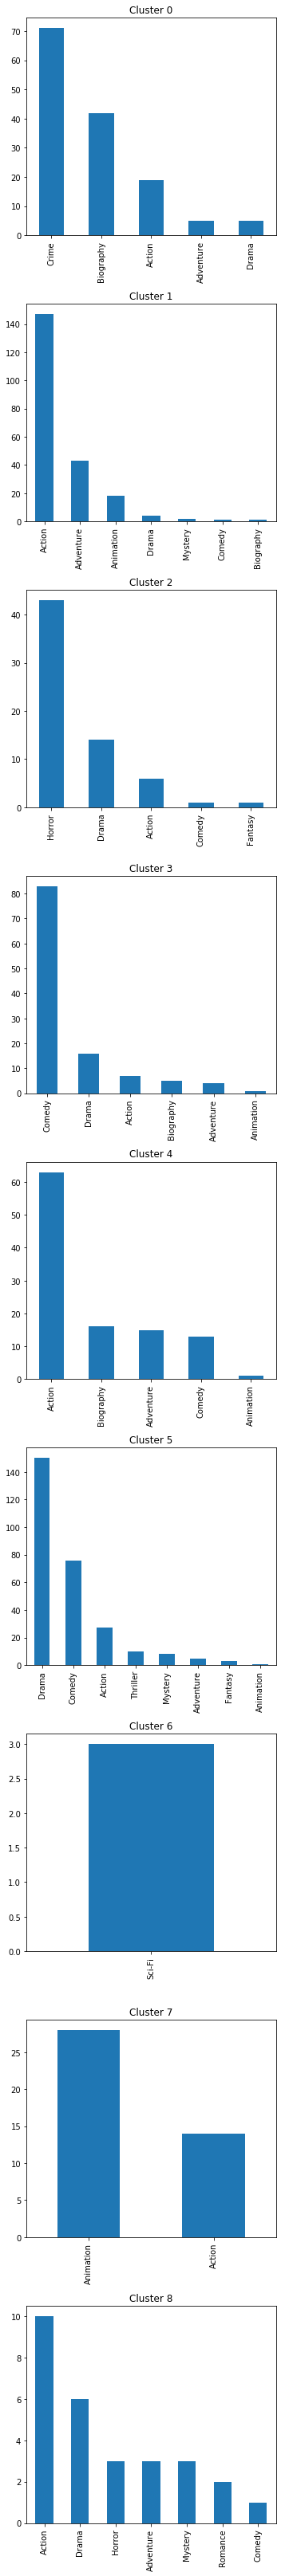

In [230]:
genre_by_cluster(9, movies)

In [231]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre_1,Genre_2,Genre_3,labels
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,1
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,1
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,No genre,2
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,1
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,1


In [ ]:
movies.head()

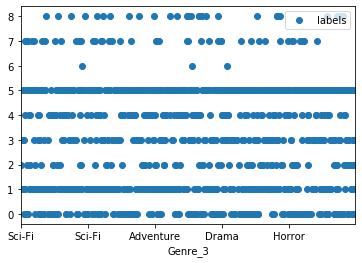

In [232]:
movies.plot(x='Genre_3', y='labels', style='o')


//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


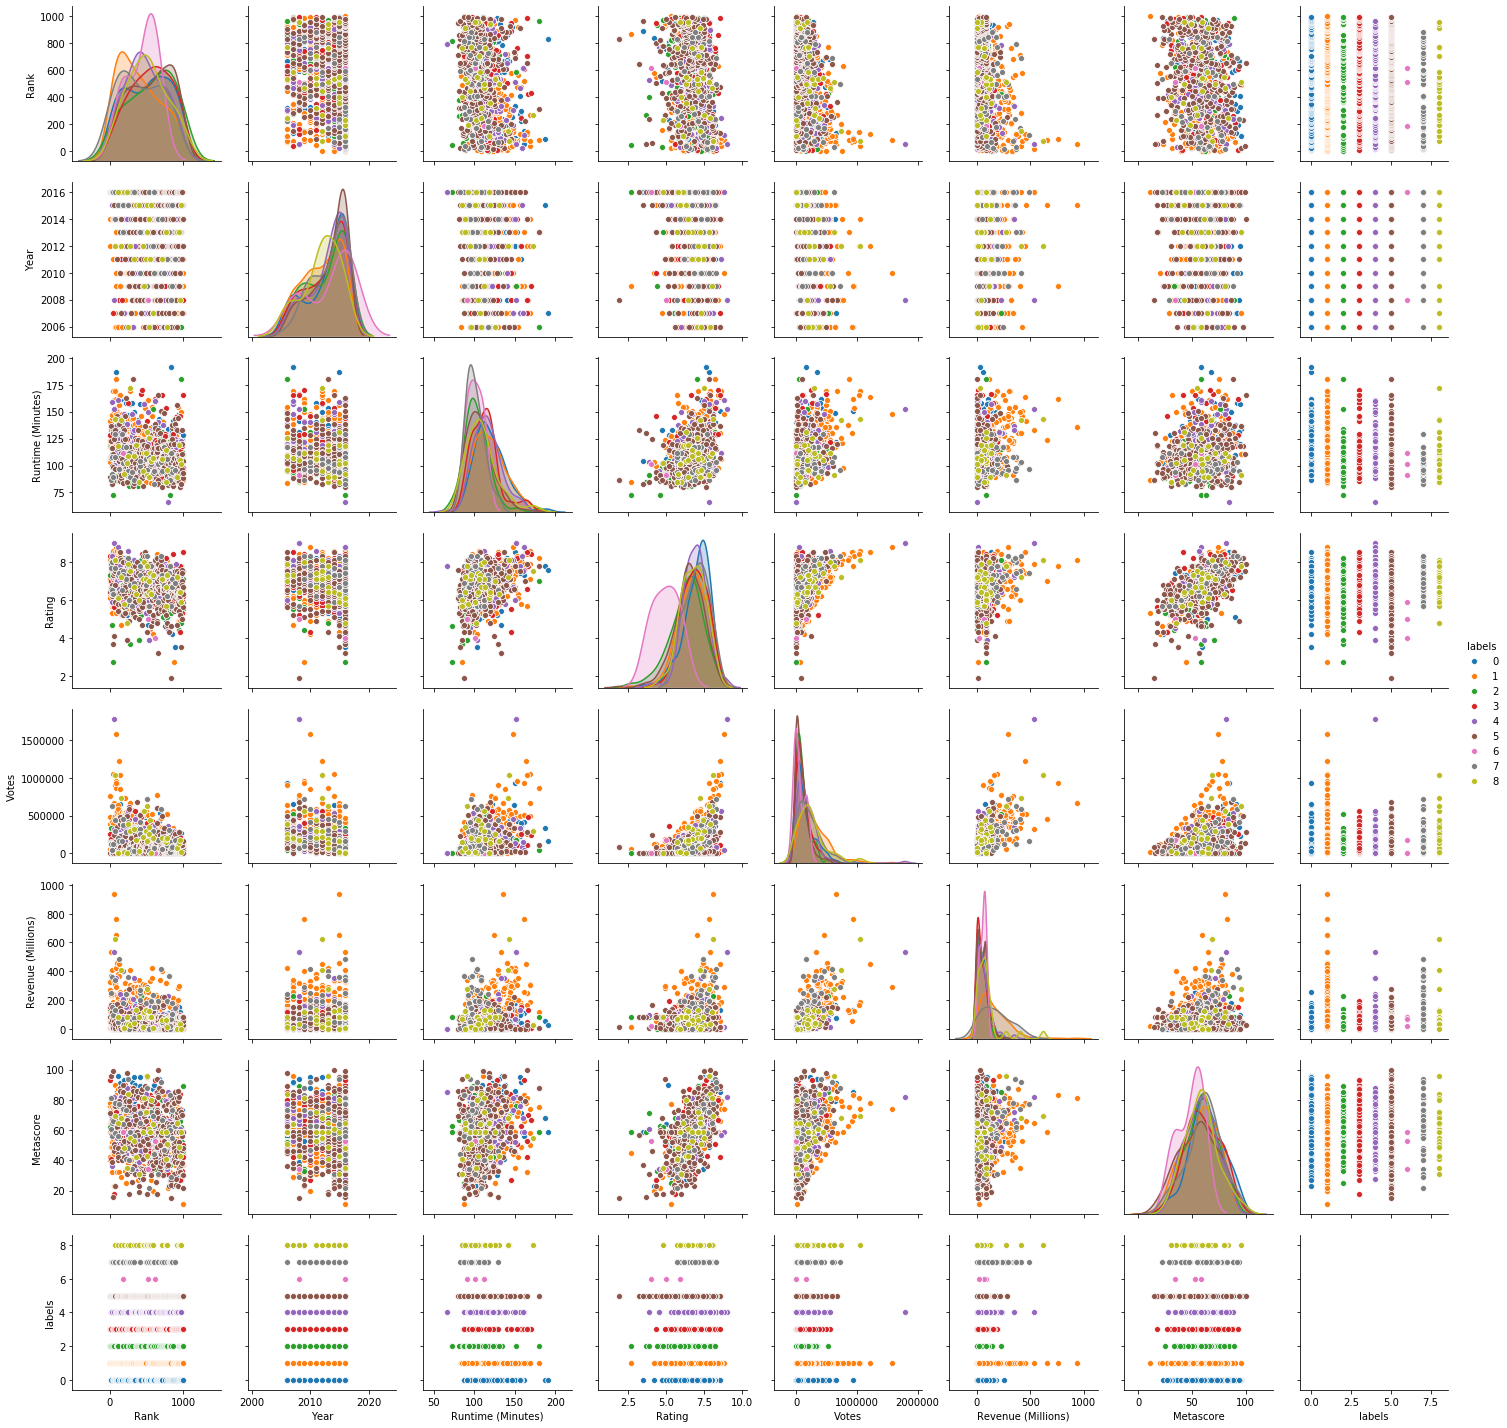

In [233]:
import seaborn as sns

#sns.pairplot(movies['Metascore','Rating'], hue='labels')
sns.pairplot(movies, hue='labels')